# Clustering de données

                                                

# A)K_MEANS

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [3]:
iris = datasets.load_iris() 
X = iris.data 
Y = iris.target


In [4]:
def Kmeans(X,K,rseed):
    
    # 1. Initialisation (choix aléatoire de centroids)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:K]
    centers = X[i]
    #print("Les centres initiaux :\n",centers)
    #print("***_***"*5)
    j=0
    while True:
        # 2a. Etiquettage a base des proches centroids
        etiquettes = pairwise_distances_argmin(X, centers)
        #print("les etiquettes  :\n",etiquettes,"itéra :",j)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[etiquettes == i].mean(0)
                                for i in range(K)])
        
        # 2c. COnvergence.
        if np.all(centers == new_centers):
            break
        centers = new_centers
        j=j+1
        #print("les nvx centres :\n",centers ,"itéra :",j)
    #print("***_***"*4)
    #print("Centres finaux :\n",centers ,"\n Etiquettes :\n",etiquettes,"\n Nbre d'itéra :\n",j)
    #print("***_***"*4)
    return centers, etiquettes
    

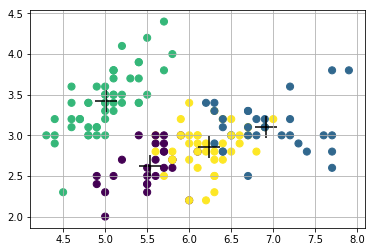

In [5]:
centers, labels = Kmeans(X, 4,10)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c="black",marker="+",s=500)
plt.grid()

In [6]:
# sklearn 
from sklearn.cluster import KMeans
_kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_labels=_kmeans.labels_
print("Labels","***"*5)
print(kmeans_labels)
print("***"*5)
kmean_centers =_kmeans.cluster_centers_
print("Centers","***"*5)
kmean_centers

Labels ***************
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]
***************
Centers ***************


array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

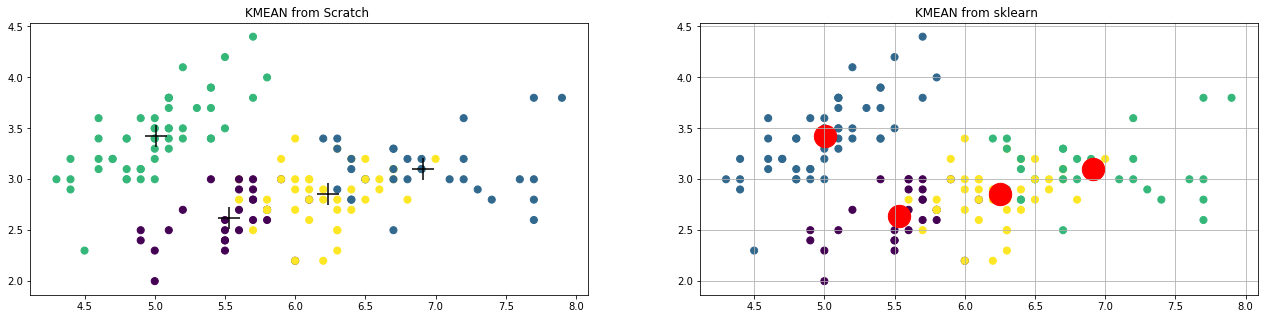

In [7]:
plt.figure(figsize=(22,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c="black",marker="+",s=500)
plt.title("KMEAN from Scratch ")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels,s=50, cmap='viridis')
plt.scatter(kmean_centers[:,0],kmean_centers[:,1],c="red",marker="o",s=500)
plt.title("KMEAN from sklearn ")
plt.grid()

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [9]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    
    centers, labels = Kmeans(X, n_clusters,rseed=20)
    silhouette_avg = silhouette_score(X, labels)
    print("*****************************************************")
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    print("*****************************************************")

*****************************************************
For n_clusters = 2 The average silhouette_score is : 0.681046169211746
*****************************************************
*****************************************************
For n_clusters = 3 The average silhouette_score is : 0.5511916046195916
*****************************************************
*****************************************************
For n_clusters = 4 The average silhouette_score is : 0.49745518901737446
*****************************************************
*****************************************************
For n_clusters = 5 The average silhouette_score is : 0.45852537090344886
*****************************************************
*****************************************************
For n_clusters = 6 The average silhouette_score is : 0.43431953398540646
*****************************************************
*****************************************************
For n_clusters = 7 The average silhouette_sc

*****************************************************
For n_clusters = 2 The average silhouette_score is : 0.681046169211746
*****************************************************


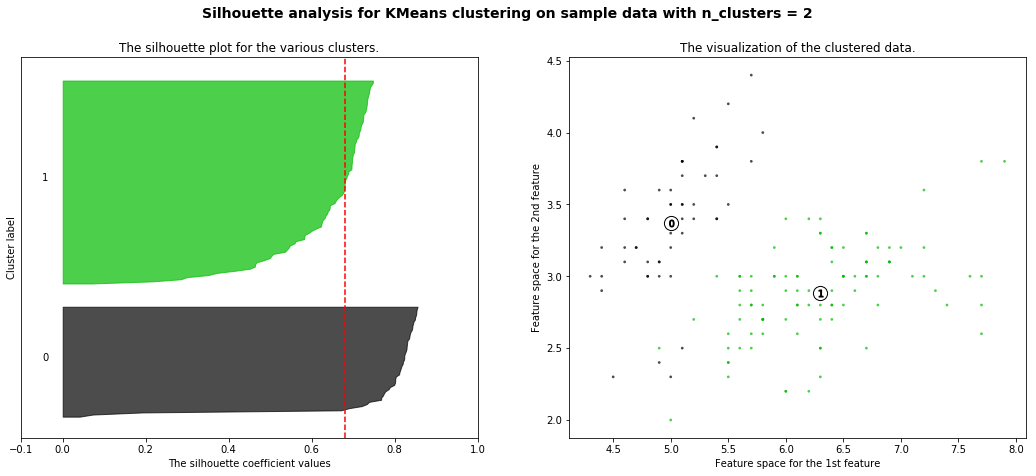

*****************************************************
For n_clusters = 3 The average silhouette_score is : 0.5511916046195916
*****************************************************


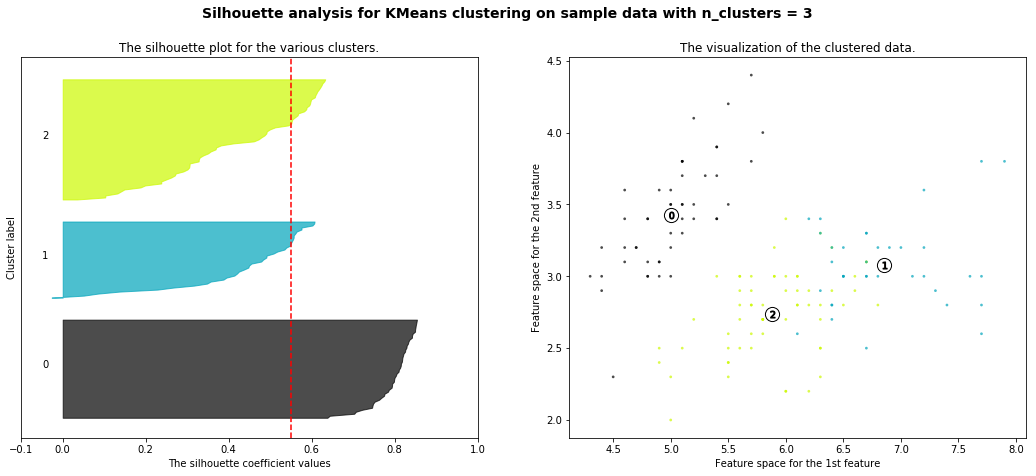

*****************************************************
For n_clusters = 4 The average silhouette_score is : 0.49745518901737446
*****************************************************


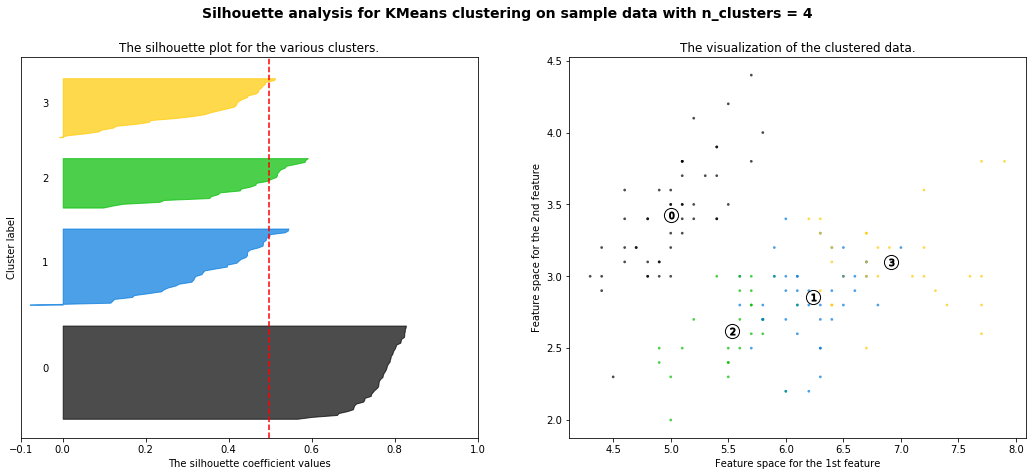

*****************************************************
For n_clusters = 5 The average silhouette_score is : 0.45852537090344886
*****************************************************


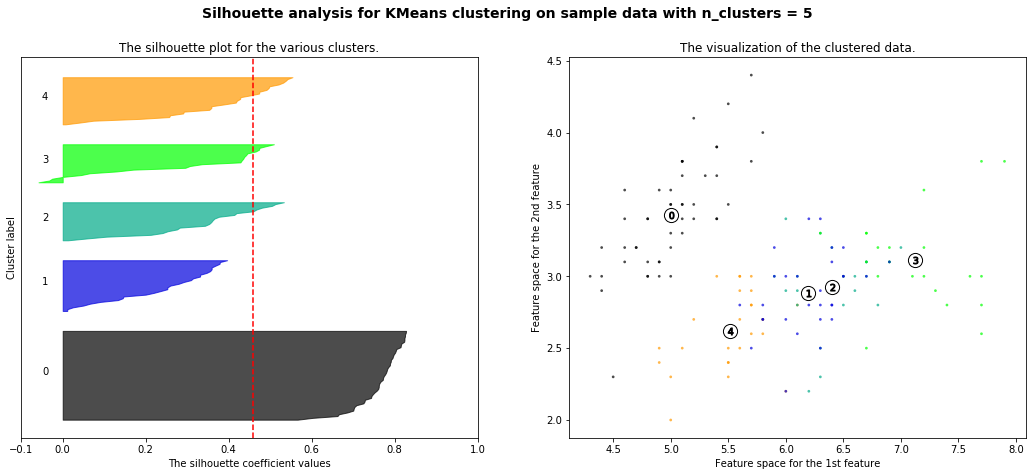

*****************************************************
For n_clusters = 6 The average silhouette_score is : 0.43431953398540646
*****************************************************


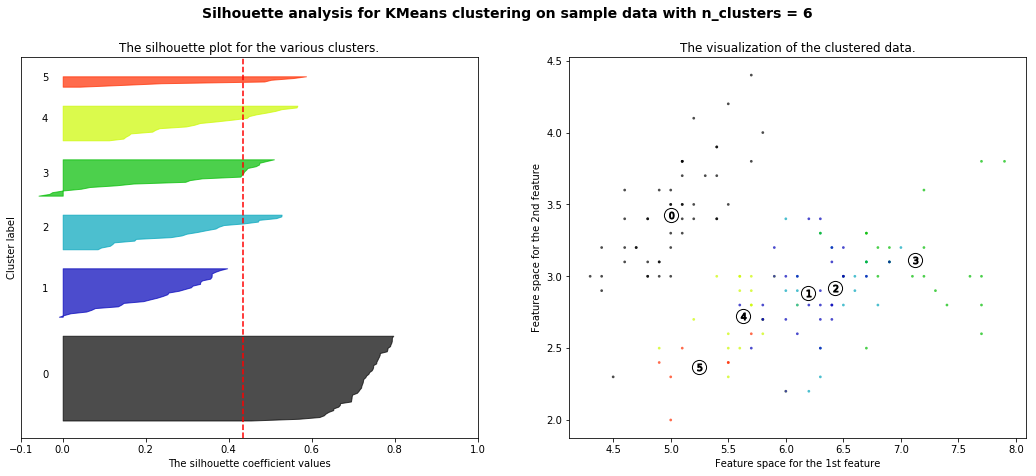

*****************************************************
For n_clusters = 7 The average silhouette_score is : 0.4621733522969737
*****************************************************


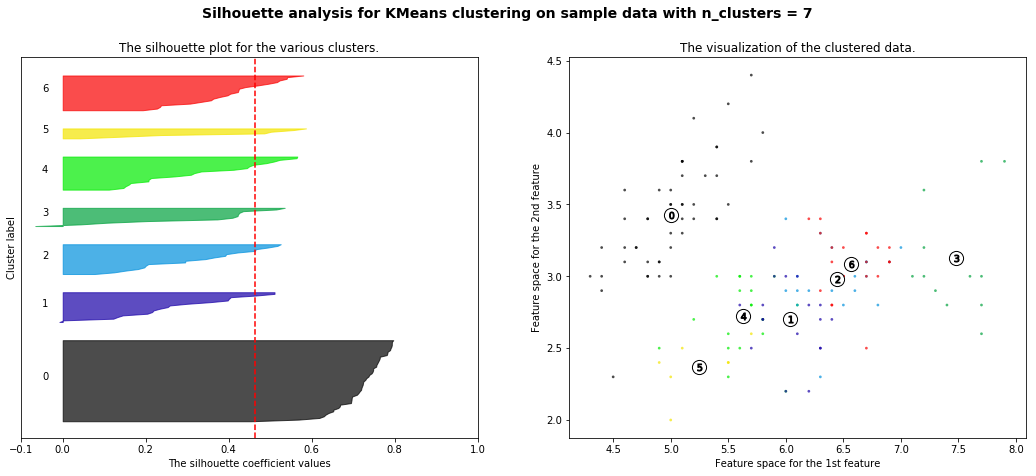

*****************************************************
For n_clusters = 8 The average silhouette_score is : 0.3519340715227998
*****************************************************


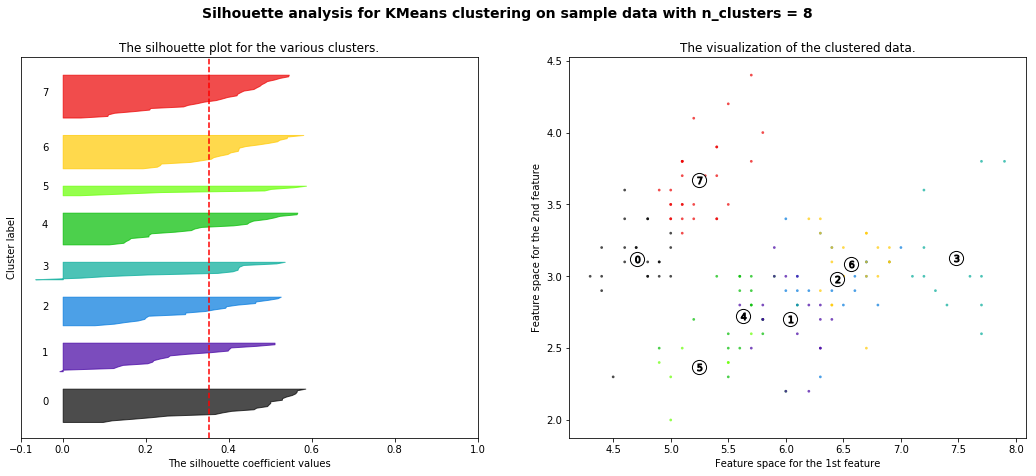

*****************************************************
For n_clusters = 9 The average silhouette_score is : 0.32218613078071606
*****************************************************


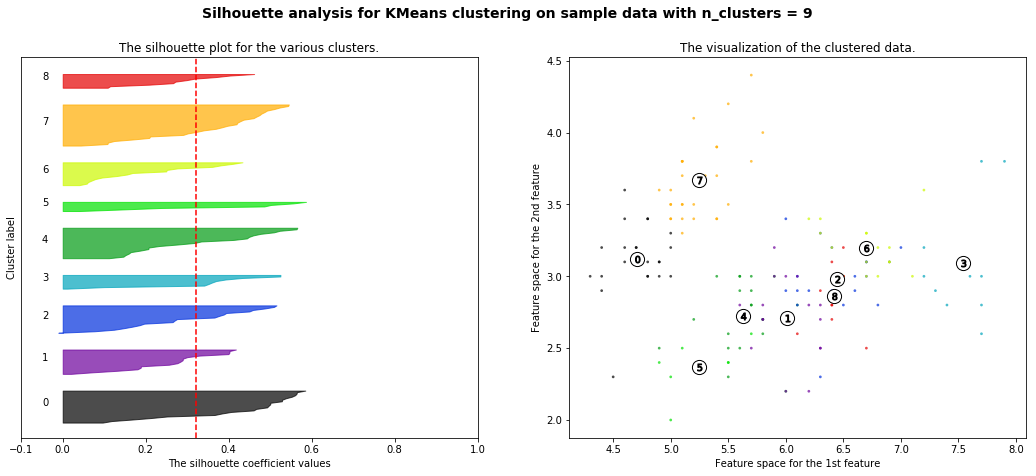

*****************************************************
For n_clusters = 10 The average silhouette_score is : 0.2836257816762088
*****************************************************


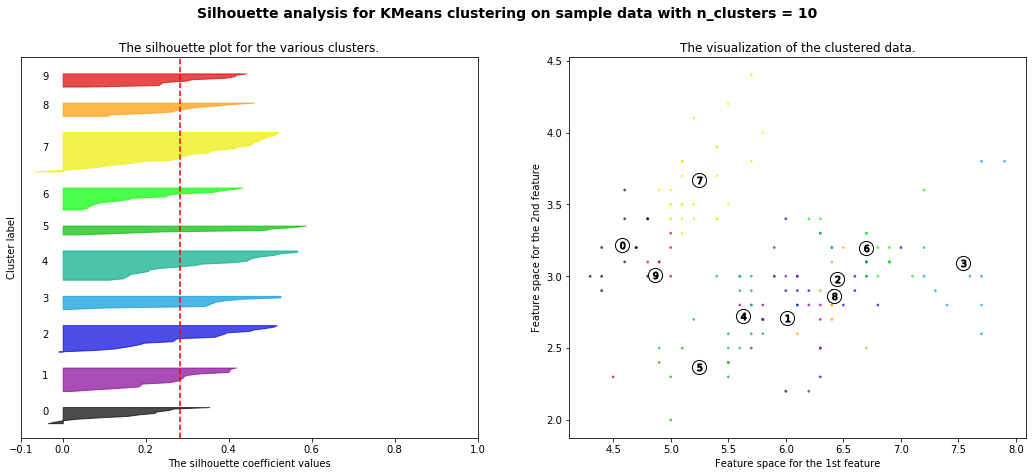

In [10]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    centers, labels = Kmeans(X, n_clusters,rseed=20)
    
    ###
    #centers, labels = 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, labels)
    print("*****************************************************")
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    print("*****************************************************")
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = centers
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [11]:
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [12]:
Iris_pca = PCA(n_components=4).fit_transform(X)
Iris_lda = LDA(n_components=4).fit(X,labels).transform(X)

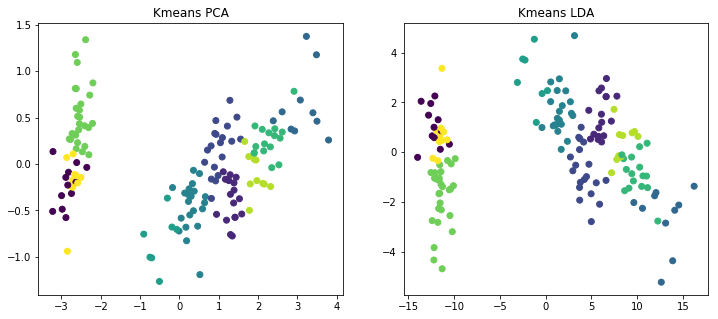

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Iris_pca[:, 0], Iris_pca[:, 1],c=labels)
plt.title("Kmeans PCA")
plt.subplot(122)
plt.scatter(Iris_lda[:, 0], Iris_lda[:, 1], c=labels)
plt.title("Kmeans LDA")
plt.show()

# Analyse des données "Choix Projet"

In [14]:
import csv
import pandas as pd 

In [15]:
data = pd.read_csv('choixprojetstab.csv',delimiter=";")
print(data.shape)

(71, 81)


In [16]:
import csv
from sklearn.cluster import MeanShift

spamReader = csv.reader(open('choixprojetstab.csv', newline='', encoding='utf-8'), delimiter=';', quotechar='|')
res = [row for row in spamReader]
res = np.array(res)
# on a suppr le premier row et le premier col
M = np.array(res[1:,1:], dtype=np.float64)
C = res[1:,:1]
C = np.array([e[0] for e in C])

print('data shape : ', np.shape(M))
print('etud shape : ', np.shape(C))

data shape :  (71, 80)
etud shape :  (71,)


In [17]:
C

array(['bl/.vSDYCGrSs', 'bl/1NiMubceBs', 'bl/dvgMTLVSvk', 'bl1NWhKcNADF2',
       'bl1ao5B7htJfQ', 'bl1u./AF8TEp6', 'bl2LwDaKpKT/c', 'bl2jhb3v2qUhc',
       'bl2rqWgKava4o', 'bl4wbw9k3zw/c', 'bl5.Z2M26c/5o', 'bl5/1tjKhKrAE',
       'bl55W0uSMrpz6', 'bl65TErI.VjAA', 'bl9BdxOPgV0XU', 'bl9HR9LuSmrMo',
       'blA5K4GlKIEN2', 'blB6OJg1ilNV2', 'blC888Fel.osw', 'blDPCjzWCczr6',
       'blFD1aQDfmpH.', 'blFq6YzuUpuG6', 'blGDihFnA6.LE', 'blHIVuF4ftibA',
       'blHxzJKy1kWeU', 'blIf9FrZBwJyk', 'blK.9jBCD/SSw', 'blKXgoRO0CXOE',
       'blKsQZNr3tnvw', 'blMKFlGVYbnSA', 'blNDVy9IQ.pyc', 'blQdUJch/nfDg',
       'blSI8b6JyYqHY', 'blUiqJyD6t5eo', 'blXfmkaW817T6', 'blXtkgxAdNzb.',
       'blYb2ABO7EU.M', 'blZxs/nnNLCos', 'blZzwRPNDZpRY', 'blaADEMnN043A',
       'blaIQ61DLW6uc', 'blbKjW2k4.8xo', 'blbfVllTjpkQY', 'blbkl9iy6NSzQ',
       'blddve1gjnw96', 'blfIGd5mN48z2', 'blg1OtiwNMDAs', 'blg8PMUnKJxes',
       'blginkLBh0Sf.', 'blh9lEioXhmgc', 'blhai4aeyq8rU', 'blhnNMwGPnuNc',
       'bliYbAmgGkzSI', '

c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5, 1.0, 'sklearn.cluster KMeans silhouette_score = 0.2978719704538733')

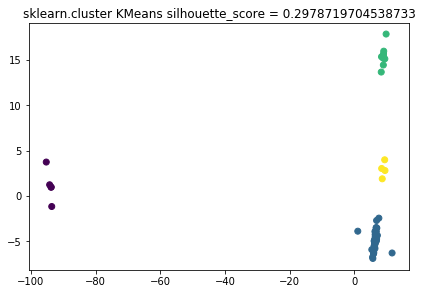

In [18]:
best = 0
for i in range(100):
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(M)
    kmy = kmeans.labels_
    nysil = silhouette_score(M, kmy)
    if nysil >= best:
        best = nysil

kmclf = LDA(n_components=4)
kmLDA = kmclf.fit(M, kmy).transform(M)

plt.rcParams["figure.figsize"] = (15,10)
plt.figure()
kmclasses=(kmy)
plt.subplot(2, 2, 1)
plt.scatter(kmLDA[:,0], kmLDA[:,1], c=kmclasses)
plt.title('sklearn.cluster KMeans silhouette_score = '+str(best))

# ------------------------------------------------------------------------------------








c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


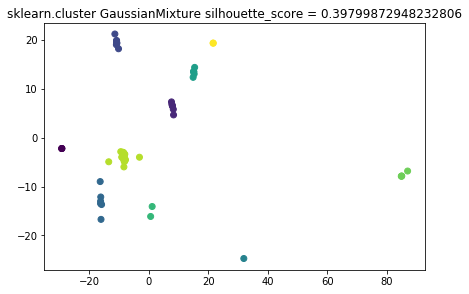

In [19]:
# ------------------------------------------------------------------------------------
best = 0
for i in range(100):
    gmmcluster = GaussianMixture(n_components=n_clusters, covariance_type='full')
    gmmcluster.fit(M)
    cluster_labels=gmmcluster.predict(M)
    gmms=cluster_labels
    gmmsil=silhouette_score(M, gmms)
    if gmmsil >= best:
        best = gmmsil
gmmsLDA = kmclf.fit(M, gmms).transform(M)
kmclasses=(gmms)
plt.subplot(2, 2, 3)
plt.scatter(gmmsLDA[:,0], gmmsLDA[:,1], c=kmclasses)
plt.title('sklearn.cluster GaussianMixture silhouette_score = '+str(best))
plt.show()

        

c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5, 1.0, 'sklearn.cluster SpectralClustering silhouette_score = 0.15639364374444178')

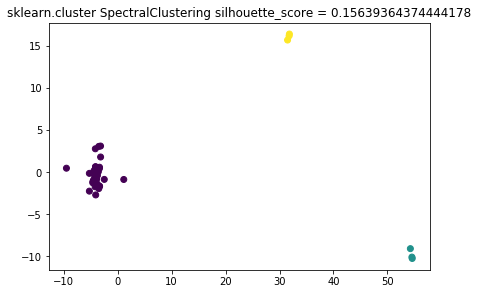

In [20]:
#--------------------------------------------------------------------------------------

best = 0
for i in range(100):
    clustering = SpectralClustering(n_clusters=4,assign_labels="discretize",random_state=0).fit(M)
    spectrals = clustering.labels_
    specsil = silhouette_score(M, spectrals)
    if nysil >= best:
        best = specsil


specLDA = kmclf.fit(M, spectrals).transform(M)
kmclasses=(spectrals)
plt.subplot(2, 2, 3)
plt.scatter(specLDA[:,0], specLDA[:,1], c=kmclasses)
plt.title('sklearn.cluster SpectralClustering silhouette_score = '+str(best))


c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


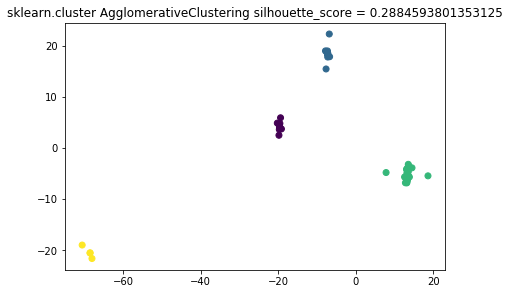

In [21]:
# ------------------------------------------------------------------------------------
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')
best = 0
for i in range(100):
    aggclustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated').fit(M)
    agg = aggclustering.labels_
    aggsil = silhouette_score(M, agg)
    if nysil >= best:
        best = aggsil

aggLDA = kmclf.fit(M, agg).transform(M)
kmclasses=(agg)
plt.subplot(2, 2, 4)
plt.scatter(aggLDA[:,0], aggLDA[:,1], c=kmclasses)
plt.title('sklearn.cluster AgglomerativeClustering silhouette_score = '+str(best))
plt.show()
